In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [2]:
import random
random.seed(1)
base_X = 25
base_Y = -100
ETx = 50*0.000000001
ERc = ETx
epsilon_amp = 10*0.000000000001
num_clusters = 5
num_nodes = 100
energy = 0.5
packet_bit = 200
num_rounds = 4000
aggr = 5*0.000000001
aggr_rate = 0.5
aggr_pkt

In [3]:
class Cluster:
    def __init__(self):
        self.nodes = []
        self.head = None
        self.bits = 0
        
    def add(self, node):
        self.nodes.append(node)
        
    def is_head(self, node):
        return node == self.head
    
    def dis(self, node):
        return distance(node.X, self.head.X, node.Y, self.head.Y)

In [4]:
def distance(x_1, x_2, y_1, y_2):
    return (x_1 - x_2)**2 + (y_1 - y_2)**2

In [5]:
import random

class Node:
    def __init__(self, x, y):
        self.X = x
        self.Y = y
        self.energy = energy
        self.die = False
        self.cluster = clusters[random.randint(0,num_clusters - 1)]
        #self.in_cluster(self.cluster)
    
    def in_cluster(self):
        if len(self.cluster.nodes) == 0:
            self.cluster.head = self
            self.cluster.add(self)
        else:
            self.cluster.add(self)
    
    def send(self):
        if self.cluster.is_head(self):
            if self.cluster.bits == 0:
                transmission = ETx * packet_bit
                amplification = epsilon_amp * packet_bit * distance(self.X, base_X, self.Y, base_Y)
                if self.energy < transmission + amplification:
                    self.die = True
                else:
                    self.energy -= (transmission + amplification)
            else:
                transmission = ETx * aggr_rate * (packet_bit + self.cluster.bits)
                amplification = epsilon_amp * aggr_rate * (packet_bit + self.cluster.bits) * distance(self.X, base_X, self.Y, base_Y)
                if self.energy < transmission + amplification + aggr:
                    self.die = True
                else:
                    self.energy -= (transmission + amplification + aggr)
        else:
            if self.cluster.head.die:
                self.die = True
                return
            transmission = ETx * packet_bit
            amplification = epsilon_amp * packet_bit * self.cluster.dis(self)
            if self.energy < transmission + amplification:
                self.die = True
            else:
                self.energy -= (transmission + amplification)
            receive = ERc * packet_bit
            self.cluster.head.energy -= receive
            self.cluster.bits += packet_bit

In [6]:
Xs = uniform.rvs(loc=0, scale=50, size=num_nodes)
Ys = uniform.rvs(loc=0, scale=50, size=num_nodes)

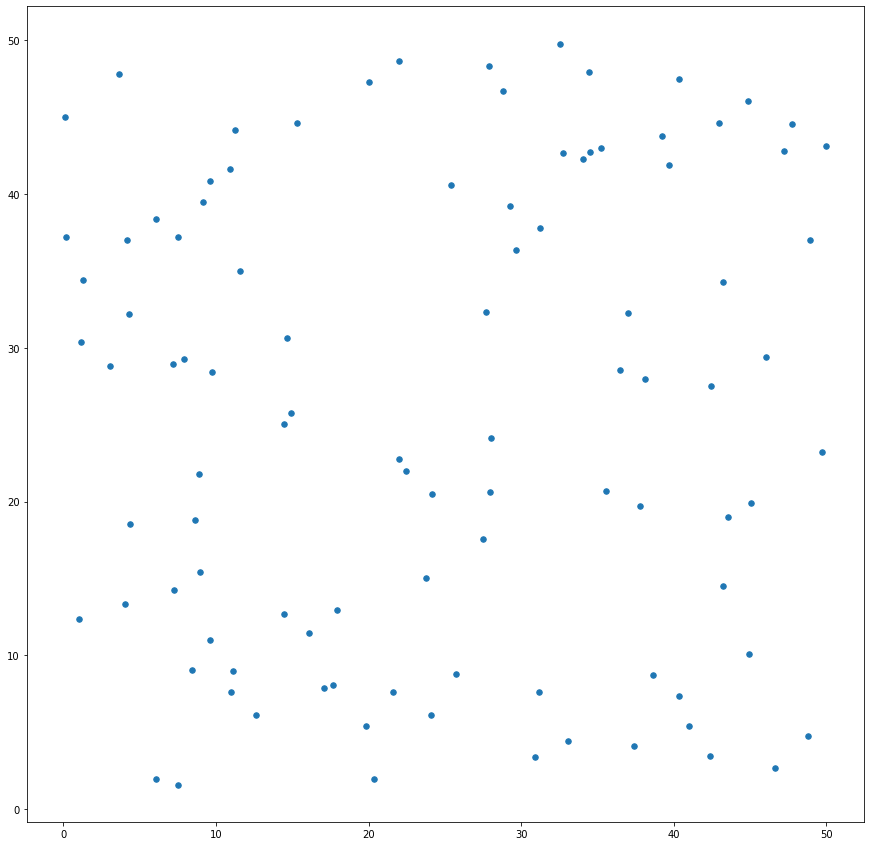

In [7]:
plt.figure(figsize=(15, 15))
plt.scatter(Xs, Ys, s = 30)

In [22]:
Nodes = [None for i in range(num_nodes)]
clusters = [Cluster() for i in range(num_clusters)]

for i in range(num_nodes):
    Nodes[i] = Node(Xs[i], Ys[i])
    Nodes[i].in_cluster()

dead = []
for i in range(50):
    #print(Nodes[90].energy)
    for j in range(num_nodes):
        if j not in dead:
            Nodes[j].send()
            if Nodes[j].die:
                dead.append(j)
    if i%5 == 0:
        print(i, len(dead))

0 0
5 0
10 0
15 0
20 0
25 0
30 0
35 0
40 25
45 45


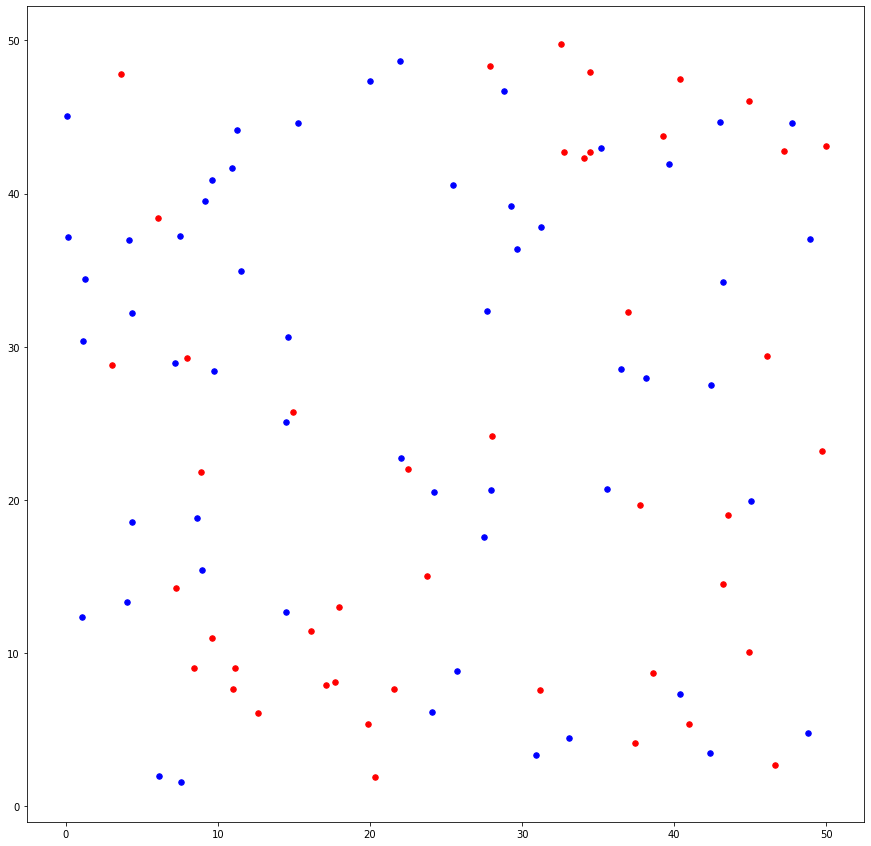

In [23]:
plt.figure(figsize=(15, 15))
dead_X = []
dead_Y = []
undead_X = []
undead_Y = []
for i in range(num_nodes):
    if i in dead:
        dead_X.append(Xs[i])
        dead_Y.append(Ys[i])
    else:
        undead_X.append(Xs[i])
        undead_Y.append(Ys[i])
plt.scatter(dead_X, dead_Y, s = 30, color = 'red')
plt.scatter(undead_X, undead_Y, s = 30, color = 'blue')